# Algebra BUG HUNT!

In [49]:
import numpy as np
import sympy as sym
from IPython.display import Math, display
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# create a list
lst = [1, 3, 4, 1, 6]

print(lst)

[1, 3, 4, 1, 6]


In [9]:
# add all the numbers together
print( np.sum(lst) )

15


[ -4  -7  -9 -10 -10  -9  -7  -4   0   5  11  18  26  35]


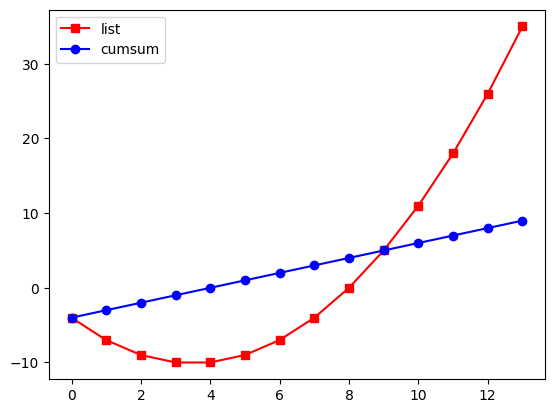

In [3]:
# plot the cumulative sum of a list of numbers
l = np.arange(-4, 10)

print(np.cumsum(l))
plt.plot(np.cumsum(l),'rs-')
plt.plot(l,'bo-')
plt.legend({'list','cumsum'})
plt.show()

In [27]:
### the equation:
# 4 - 2x + 5x^3
x, y = sym.symbols('x, y')

f_x = sym.Poly(5*x**3 - 2*x + 4)

coefs = f_x.coeffs()
print(coefs)

# solve
roots = sym.solve(f_x)

for root_idx, root in enumerate(roots, start=1):
    display(Math('\\text{Root } %s \\qquad %s' % (root_idx, sym.latex(sym.simplify(root)))))
    # print(f"Root # {root_idx}. {root}")
# p = sym.Poly(coefs,x)

display(Math(sym.latex(f_x.as_expr())))

[5, -2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
def quadeq(a, b, c):
    out = np.zeros(2, dtype="complex")
    # compute
    out[0] = ( -b - np.lib.scimath.sqrt(b**2 - 4*a*c) ) / (2*a)
    out[1] = ( -b + np.lib.scimath.sqrt(b**2 - 4*a*c) ) / (2*a)
    
    # output
    return out

# test the function
print(quadeq(1,4,2))

[-3.41421356+0.j -0.58578644+0.j]


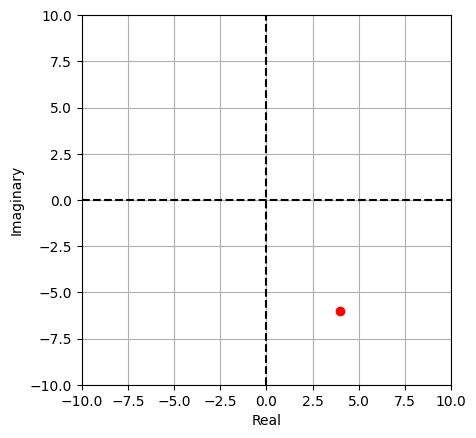

In [34]:
# create a complex number

real_part = 4
imag_part = -6


cn = complex(real_part, imag_part)

plt.plot(cn.real, cn.imag,'ro')
plt.plot([-10, 10], [0, 0], 'k--')
plt.plot([0, 0], [-10, 10], 'k--')
plt.grid()
plt.axis('square')
plt.axis([-10,10,-10,10])
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [43]:
# symbolic complex number
a,b = sym.symbols('a, b',real=True)

z = a + b*sym.I
display(Math('z \\times z^* = %s = %s' % (sym.latex(z*sym.conjugate(z)), sym.latex(sym.expand(z*sym.conjugate(z))))))

<IPython.core.display.Math object>

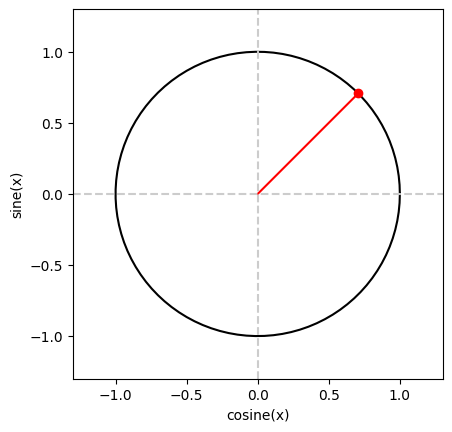

In [53]:
# define the phase angles
x = np.linspace(0, 2*np.pi, 100)

# generate the plot
plt.plot(np.cos(x), np.sin(x), 'k')

# draw one vector from the origin
phs = 1 * np.pi/4
plt.plot([0, np.cos(phs)], [0 ,np.sin(phs)],'r-')
plt.plot(np.cos(phs), np.sin(phs),'ro')


# draw axis lines
plt.plot([-1.3,1.3], [0,0],'--',color=[.8,.8,.8])
plt.plot([0,0], [-1.3,1.3],'--',color=[.8,.8,.8])

# make it look nicer
plt.axis('square')
plt.axis([-1.3,1.3,-1.3,1.3])
plt.xlabel('cosine(x)')
plt.ylabel('sine(x)')
plt.plot()

plt.show()

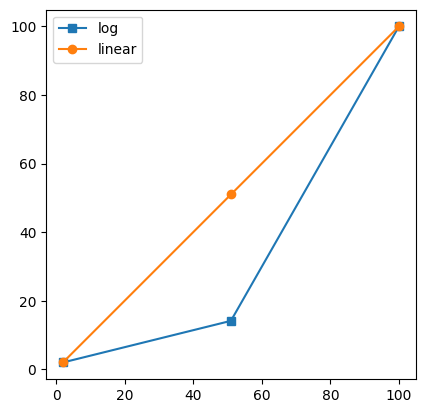

In [46]:
a =   2 # lower bound
b = 100 # upper bound
n =   3 # number of steps

lo = np.logspace(np.log10(a), np.log10(b), n)
li = np.linspace(a, b, n)

plt.plot(li, lo,'s-',label='log')
plt.plot(li, li,'o-',label='linear')

plt.legend()
plt.axis('square')
plt.show()

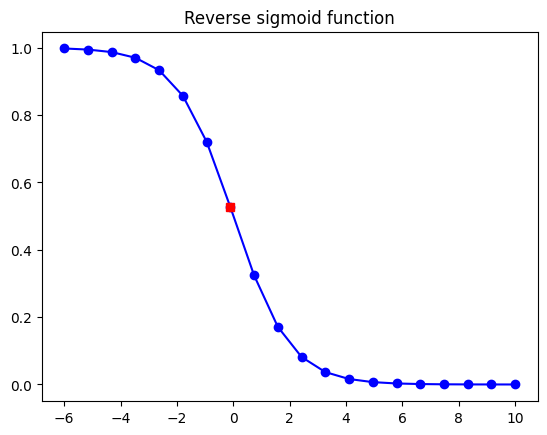

In [54]:
## Goal is to plot the point on the function closest to f(x)=.5

# x range
x = np.linspace(-6,10,20)

# the function f(x)
fx = 1/(1+np.exp(x))

# function maximum
fmaxidx = np.argmin(abs(fx-.5))

# draw the function
plt.plot(x, fx, 'bo-')
plt.plot(x[fmaxidx], fx[fmaxidx],'rs')

plt.title('Reverse sigmoid function')

plt.show()

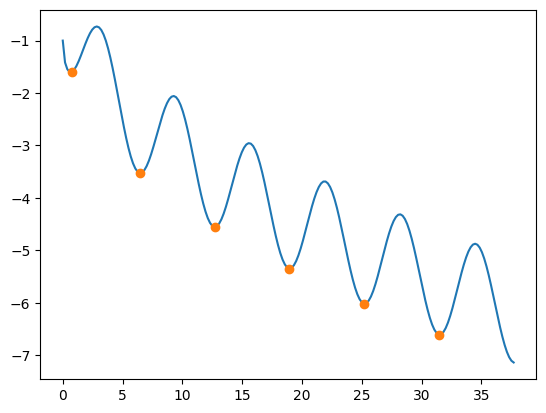

In [52]:
## Goal is to find the local minima by adding one character

# x range
x = np.linspace(0, 12*np.pi, 200)

# the function f(x)
fx = -(np.cos(x) + x**(1/2))

# find peaks
peeks = find_peaks(-fx)

# draw the function
plt.plot(x, fx)
plt.plot(x[peeks[0]], fx[peeks[0]],'o')
plt.show()
